In [70]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
import sqlite3
# supervised model for labels

In [2]:
# Load the data

housing_df = pd.read_csv('ProjectTestData/housing_data_clean.csv')
crime_df = pd.read_csv('ProjectTestData/crime_count_data_clean.csv')
noise_df = pd.read_csv('ProjectTestData/Parcel_ExportTable_WithNoise_Cleaned.csv')

# conn = sqlite3.connect('housingSQL.db')
# query = "SELECT * FROM housing_table"
# homes_df = pd.read_sql_query(query, conn)
# conn.close()

# sql_query = pd.read_sql_query('''
#                               select * from DATAPORTFOLIO.dbo.WAKE_COUNTY_HOUSING_DATA
#                               '''
#                               ,conn) # here, the 'conn' is the variable that contains your database connection

# df = pd.DataFrame(sql_query)

housing_df.head()

# logistic is binary, k means is clusters (consumers based on income)

,TOTAL_VALUE,SITE_ADDRESS,CITY,ZIP_CODE,PLANNING_JURISDICTION,ZONING,ACREAGE,HEATED_AREA,AGE,BATH,REMODEL_ADDITION,STYLE
0,249321,2457 BERTIE DR,RALEIGH,27610,10,4.0,0.21,1828,59,2.0,0,8
1,159933,2848 PROVIDENCE RD,RALEIGH,27610,10,4.0,0.46,1240,53,1.0,0,0
2,222624,409 S LAKESIDE DR,RALEIGH,27606,10,4.0,0.43,1037,24,2.0,0,0
3,150723,540 MARSHBURN RD,WENDELL,27591,14,3.0,0.46,2261,123,2.0,0,0
4,140801,605 WOODLAND RD,RALEIGH,27603,6,2.0,0.51,996,67,1.0,0,0


In [3]:
housing_df

,TOTAL_VALUE,SITE_ADDRESS,CITY,ZIP_CODE,PLANNING_JURISDICTION,ZONING,ACREAGE,HEATED_AREA,AGE,BATH,REMODEL_ADDITION,STYLE
0,249321,2457 BERTIE DR,RALEIGH,27610,10,4.0,0.21,1828,59,2.0,0,8
1,159933,2848 PROVIDENCE RD,RALEIGH,27610,10,4.0,0.46,1240,53,1.0,0,0
2,222624,409 S LAKESIDE DR,RALEIGH,27606,10,4.0,0.43,1037,24,2.0,0,0
3,150723,540 MARSHBURN RD,WENDELL,27591,14,3.0,0.46,2261,123,2.0,0,0
4,140801,605 WOODLAND RD,RALEIGH,27603,6,2.0,0.51,996,67,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
185926,137044,6237 TEN TEN RD,APEX,27539,13,NaN,1.18,1456,36,2.0,0,13
185927,474932,500 KENT DR,CARY,27511,2,NaN,1.77,3110,26,2.5,0,0
185928,235612,1305 PONDEROSA DR,RALEIGH,27603,13,NaN,2.07,1640,61,2.0,0,0
185929,897806,1809 STILLWATER DR,RALEIGH,27607,10,4.0,0.34,3202,6,3.5,0,0


In [4]:
crime_df

,CITY,PERSONAL_CHARGE_COUNT,PERSONAL_NAME_COUNT,PROPERTY_CHARGE_COUNT,PROPERTY_NAME_COUNT,DRUG_CHARGE_COUNT,DRUG_NAME_COUNT,TOTAL_CHARGE_COUNT,TOTAL_NAME_COUNT
0,ANGIER,0,0,2,1,0,0,2,1
1,APEX,144,112,215,130,146,77,505,319
2,CARY,404,319,293,187,239,145,936,651
3,CLAYTON,11,6,9,4,7,4,27,14
4,CREEDMOOR,1,1,13,1,1,1,15,3
5,DURHAM,18,9,23,8,6,4,47,21
6,FUQUAY-VARINA,154,116,139,87,223,126,516,329
7,GARNER,259,202,441,286,285,171,985,659
8,HOLLY SPRINGS,111,88,205,110,272,133,588,331
9,KNIGHTDALE,109,83,143,95,95,54,347,232


In [5]:
noise_df

,TOTAL_VALUE,HEATED_AREA,SITE_ADDRESS,CITY,PLANNING_JURISDICTION,YEAR_BUILT,STYLE,ZIP_CODE,NOISE_CATEGORY,AIR_NOISE
0,485353,2987,408 CHANDLER GRANT DR,CARY,CA,2004,Conventional,27519,1,46.006540
1,381202,2453,105 LAKE BRANDT DR,CARY,CA,1997,Townhouse,27519,1,47.749096
2,297026,1641,135 WALTONS CREEK RD,MORRISVILLE,MO,1993,Conventional,27560,1,45.014290
3,270414,1267,139 WALTONS CREEK RD,MORRISVILLE,MO,1993,Conventional,27560,1,45.074585
4,876297,6318,207 KALVESTA DR,MORRISVILLE,MO,2001,Conventional,27560,1,46.160683
...,...,...,...,...,...,...,...,...,...,...
10913,407441,2705,6120 BLAKEMAN LN,RALEIGH,RA,2007,Conventional,27617,2,49.103012
10914,744169,1635,405 WATKINS RD,MORRISVILLE,MO,1970,Conventional,27560,3,53.249355
10915,533692,4139,104 PAXFORD CT,MORRISVILLE,MO,2004,Conventional,27560,2,51.026150
10916,263994,1075,802 CHURCH ST,MORRISVILLE,MO,1972,Conventional,27560,2,52.213262


In [6]:
# Check data types of all columns
housing_df.dtypes

TOTAL_VALUE                int64
SITE_ADDRESS              object
CITY                      object
ZIP_CODE                   int64
PLANNING_JURISDICTION      int64
ZONING                   float64
ACREAGE                  float64
HEATED_AREA                int64
AGE                        int64
BATH                     float64
REMODEL_ADDITION           int64
STYLE                      int64
dtype: object

In [7]:
crime_df.dtypes

CITY                     object
PERSONAL_CHARGE_COUNT     int64
PERSONAL_NAME_COUNT       int64
PROPERTY_CHARGE_COUNT     int64
PROPERTY_NAME_COUNT       int64
DRUG_CHARGE_COUNT         int64
DRUG_NAME_COUNT           int64
TOTAL_CHARGE_COUNT        int64
TOTAL_NAME_COUNT          int64
dtype: object

In [8]:
noise_df.dtypes

TOTAL_VALUE                int64
HEATED_AREA                int64
SITE_ADDRESS              object
CITY                      object
PLANNING_JURISDICTION     object
YEAR_BUILT                 int64
STYLE                     object
ZIP_CODE                  object
NOISE_CATEGORY             int64
AIR_NOISE                float64
dtype: object

In [9]:
# Joine housing data and crime data and keep all data on housing if missing joins from crime
house_crime_df = pd.merge(housing_df, crime_df, how="left", on=["CITY", "CITY"])
# Check database join
house_crime_df.head()

,TOTAL_VALUE,SITE_ADDRESS,CITY,ZIP_CODE,PLANNING_JURISDICTION,ZONING,ACREAGE,HEATED_AREA,AGE,BATH,REMODEL_ADDITION,STYLE,PERSONAL_CHARGE_COUNT,PERSONAL_NAME_COUNT,PROPERTY_CHARGE_COUNT,PROPERTY_NAME_COUNT,DRUG_CHARGE_COUNT,DRUG_NAME_COUNT,TOTAL_CHARGE_COUNT,TOTAL_NAME_COUNT
0,249321,2457 BERTIE DR,RALEIGH,27610,10,4.0,0.21,1828,59,2.0,0,8,4450.0,2945.0,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0
1,159933,2848 PROVIDENCE RD,RALEIGH,27610,10,4.0,0.46,1240,53,1.0,0,0,4450.0,2945.0,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0
2,222624,409 S LAKESIDE DR,RALEIGH,27606,10,4.0,0.43,1037,24,2.0,0,0,4450.0,2945.0,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0
3,150723,540 MARSHBURN RD,WENDELL,27591,14,3.0,0.46,2261,123,2.0,0,0,69.0,49.0,68.0,42.0,61.0,29.0,198.0,120.0
4,140801,605 WOODLAND RD,RALEIGH,27603,6,2.0,0.51,996,67,1.0,0,0,4450.0,2945.0,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0


In [10]:
# Check database join
house_crime_df

,TOTAL_VALUE,SITE_ADDRESS,CITY,ZIP_CODE,PLANNING_JURISDICTION,ZONING,ACREAGE,HEATED_AREA,AGE,BATH,REMODEL_ADDITION,STYLE,PERSONAL_CHARGE_COUNT,PERSONAL_NAME_COUNT,PROPERTY_CHARGE_COUNT,PROPERTY_NAME_COUNT,DRUG_CHARGE_COUNT,DRUG_NAME_COUNT,TOTAL_CHARGE_COUNT,TOTAL_NAME_COUNT
0,249321,2457 BERTIE DR,RALEIGH,27610,10,4.0,0.21,1828,59,2.0,0,8,4450.0,2945.0,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0
1,159933,2848 PROVIDENCE RD,RALEIGH,27610,10,4.0,0.46,1240,53,1.0,0,0,4450.0,2945.0,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0
2,222624,409 S LAKESIDE DR,RALEIGH,27606,10,4.0,0.43,1037,24,2.0,0,0,4450.0,2945.0,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0
3,150723,540 MARSHBURN RD,WENDELL,27591,14,3.0,0.46,2261,123,2.0,0,0,69.0,49.0,68.0,42.0,61.0,29.0,198.0,120.0
4,140801,605 WOODLAND RD,RALEIGH,27603,6,2.0,0.51,996,67,1.0,0,0,4450.0,2945.0,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185926,137044,6237 TEN TEN RD,APEX,27539,13,NaN,1.18,1456,36,2.0,0,13,144.0,112.0,215.0,130.0,146.0,77.0,505.0,319.0
185927,474932,500 KENT DR,CARY,27511,2,NaN,1.77,3110,26,2.5,0,0,404.0,319.0,293.0,187.0,239.0,145.0,936.0,651.0
185928,235612,1305 PONDEROSA DR,RALEIGH,27603,13,NaN,2.07,1640,61,2.0,0,0,4450.0,2945.0,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0
185929,897806,1809 STILLWATER DR,RALEIGH,27607,10,4.0,0.34,3202,6,3.5,0,0,4450.0,2945.0,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0


In [11]:
# Join housing/crime data and noise data and keep all data on housing if missing joins from noise
house_crime_noise_df = pd.merge(house_crime_df, noise_df, how="left", on=["SITE_ADDRESS", "SITE_ADDRESS"])
# Check database join
house_crime_noise_df.head()

,TOTAL_VALUE_x,SITE_ADDRESS,CITY_x,ZIP_CODE_x,PLANNING_JURISDICTION_x,ZONING,ACREAGE,HEATED_AREA_x,AGE,BATH,...,TOTAL_NAME_COUNT,TOTAL_VALUE_y,HEATED_AREA_y,CITY_y,PLANNING_JURISDICTION_y,YEAR_BUILT,STYLE_y,ZIP_CODE_y,NOISE_CATEGORY,AIR_NOISE
0,249321,2457 BERTIE DR,RALEIGH,27610,10,4.0,0.21,1828,59,2.0,...,7621.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,159933,2848 PROVIDENCE RD,RALEIGH,27610,10,4.0,0.46,1240,53,1.0,...,7621.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,222624,409 S LAKESIDE DR,RALEIGH,27606,10,4.0,0.43,1037,24,2.0,...,7621.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,150723,540 MARSHBURN RD,WENDELL,27591,14,3.0,0.46,2261,123,2.0,...,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,140801,605 WOODLAND RD,RALEIGH,27603,6,2.0,0.51,996,67,1.0,...,7621.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
house_crime_noise_df

,TOTAL_VALUE_x,SITE_ADDRESS,CITY_x,ZIP_CODE_x,PLANNING_JURISDICTION_x,ZONING,ACREAGE,HEATED_AREA_x,AGE,BATH,...,TOTAL_NAME_COUNT,TOTAL_VALUE_y,HEATED_AREA_y,CITY_y,PLANNING_JURISDICTION_y,YEAR_BUILT,STYLE_y,ZIP_CODE_y,NOISE_CATEGORY,AIR_NOISE
0,249321,2457 BERTIE DR,RALEIGH,27610,10,4.0,0.21,1828,59,2.0,...,7621.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,159933,2848 PROVIDENCE RD,RALEIGH,27610,10,4.0,0.46,1240,53,1.0,...,7621.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,222624,409 S LAKESIDE DR,RALEIGH,27606,10,4.0,0.43,1037,24,2.0,...,7621.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,150723,540 MARSHBURN RD,WENDELL,27591,14,3.0,0.46,2261,123,2.0,...,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,140801,605 WOODLAND RD,RALEIGH,27603,6,2.0,0.51,996,67,1.0,...,7621.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185926,137044,6237 TEN TEN RD,APEX,27539,13,NaN,1.18,1456,36,2.0,...,319.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185927,474932,500 KENT DR,CARY,27511,2,NaN,1.77,3110,26,2.5,...,651.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185928,235612,1305 PONDEROSA DR,RALEIGH,27603,13,NaN,2.07,1640,61,2.0,...,7621.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185929,897806,1809 STILLWATER DR,RALEIGH,27607,10,4.0,0.34,3202,6,3.5,...,7621.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Drop the unnecessary columns
house_crime_noise_df = house_crime_noise_df.drop(['TOTAL_VALUE_y', 'HEATED_AREA_y', 'CITY_y', 'PLANNING_JURISDICTION_y', 'YEAR_BUILT', 'STYLE_y', 'ZIP_CODE_y'], axis=1)

# Rename the columns
house_crime_noise_df = house_crime_noise_df.rename(columns={
    'TOTAL_VALUE_x': 'TOTAL_VALUE',
    'CITY_x': 'CITY',
    'ZIP_CODE_x': 'ZIP_CODE',
    'PLANNING_JURISDICTION_x': 'PLANNING_JURISDICTION',
    'HEATED_AREA_x': 'HEATED_AREA',
    'STYLE_x': 'STYLE',
})

house_crime_noise_df

,TOTAL_VALUE,SITE_ADDRESS,CITY,ZIP_CODE,PLANNING_JURISDICTION,ZONING,ACREAGE,HEATED_AREA,AGE,BATH,...,PERSONAL_CHARGE_COUNT,PERSONAL_NAME_COUNT,PROPERTY_CHARGE_COUNT,PROPERTY_NAME_COUNT,DRUG_CHARGE_COUNT,DRUG_NAME_COUNT,TOTAL_CHARGE_COUNT,TOTAL_NAME_COUNT,NOISE_CATEGORY,AIR_NOISE
0,249321,2457 BERTIE DR,RALEIGH,27610,10,4.0,0.21,1828,59,2.0,...,4450.0,2945.0,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0,NaN,NaN
1,159933,2848 PROVIDENCE RD,RALEIGH,27610,10,4.0,0.46,1240,53,1.0,...,4450.0,2945.0,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0,NaN,NaN
2,222624,409 S LAKESIDE DR,RALEIGH,27606,10,4.0,0.43,1037,24,2.0,...,4450.0,2945.0,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0,NaN,NaN
3,150723,540 MARSHBURN RD,WENDELL,27591,14,3.0,0.46,2261,123,2.0,...,69.0,49.0,68.0,42.0,61.0,29.0,198.0,120.0,NaN,NaN
4,140801,605 WOODLAND RD,RALEIGH,27603,6,2.0,0.51,996,67,1.0,...,4450.0,2945.0,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185926,137044,6237 TEN TEN RD,APEX,27539,13,NaN,1.18,1456,36,2.0,...,144.0,112.0,215.0,130.0,146.0,77.0,505.0,319.0,NaN,NaN
185927,474932,500 KENT DR,CARY,27511,2,NaN,1.77,3110,26,2.5,...,404.0,319.0,293.0,187.0,239.0,145.0,936.0,651.0,NaN,NaN
185928,235612,1305 PONDEROSA DR,RALEIGH,27603,13,NaN,2.07,1640,61,2.0,...,4450.0,2945.0,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0,NaN,NaN
185929,897806,1809 STILLWATER DR,RALEIGH,27607,10,4.0,0.34,3202,6,3.5,...,4450.0,2945.0,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0,NaN,NaN


In [33]:
# Change null values in Noise Category and Air Noise to 0 as this is accurate for any address missing from noise_df
house_crime_noise_df['NOISE_CATEGORY'] = house_crime_noise_df['NOISE_CATEGORY'].fillna(0)
house_crime_noise_df['AIR_NOISE'] = house_crime_noise_df['AIR_NOISE'].fillna(0)
house_crime_noise_df

,TOTAL_VALUE,SITE_ADDRESS,CITY,ZIP_CODE,PLANNING_JURISDICTION,ZONING,ACREAGE,HEATED_AREA,AGE,BATH,...,PERSONAL_CHARGE_COUNT,PERSONAL_NAME_COUNT,PROPERTY_CHARGE_COUNT,PROPERTY_NAME_COUNT,DRUG_CHARGE_COUNT,DRUG_NAME_COUNT,TOTAL_CHARGE_COUNT,TOTAL_NAME_COUNT,NOISE_CATEGORY,AIR_NOISE
0,249321,2457 BERTIE DR,RALEIGH,27610,10,4.0,0.21,1828,59,2.0,...,4450.0,2945.0,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0,0.0,0.0
1,159933,2848 PROVIDENCE RD,RALEIGH,27610,10,4.0,0.46,1240,53,1.0,...,4450.0,2945.0,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0,0.0,0.0
2,222624,409 S LAKESIDE DR,RALEIGH,27606,10,4.0,0.43,1037,24,2.0,...,4450.0,2945.0,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0,0.0,0.0
3,150723,540 MARSHBURN RD,WENDELL,27591,14,3.0,0.46,2261,123,2.0,...,69.0,49.0,68.0,42.0,61.0,29.0,198.0,120.0,0.0,0.0
4,140801,605 WOODLAND RD,RALEIGH,27603,6,2.0,0.51,996,67,1.0,...,4450.0,2945.0,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185926,137044,6237 TEN TEN RD,APEX,27539,13,NaN,1.18,1456,36,2.0,...,144.0,112.0,215.0,130.0,146.0,77.0,505.0,319.0,0.0,0.0
185927,474932,500 KENT DR,CARY,27511,2,NaN,1.77,3110,26,2.5,...,404.0,319.0,293.0,187.0,239.0,145.0,936.0,651.0,0.0,0.0
185928,235612,1305 PONDEROSA DR,RALEIGH,27603,13,NaN,2.07,1640,61,2.0,...,4450.0,2945.0,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0,0.0,0.0
185929,897806,1809 STILLWATER DR,RALEIGH,27607,10,4.0,0.34,3202,6,3.5,...,4450.0,2945.0,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0,0.0,0.0


In [42]:
house_crime_noise_df = house_crime_noise_df.dropna()
house_crime_noise_df

,TOTAL_VALUE,SITE_ADDRESS,CITY,ZIP_CODE,PLANNING_JURISDICTION,ZONING,ACREAGE,HEATED_AREA,AGE,BATH,...,PERSONAL_CHARGE_COUNT,PERSONAL_NAME_COUNT,PROPERTY_CHARGE_COUNT,PROPERTY_NAME_COUNT,DRUG_CHARGE_COUNT,DRUG_NAME_COUNT,TOTAL_CHARGE_COUNT,TOTAL_NAME_COUNT,NOISE_CATEGORY,AIR_NOISE
0,249321,2457 BERTIE DR,RALEIGH,27610,10,4.0,0.21,1828,59,2.0,...,4450.0,2945.0,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0,0.0,0.0
1,159933,2848 PROVIDENCE RD,RALEIGH,27610,10,4.0,0.46,1240,53,1.0,...,4450.0,2945.0,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0,0.0,0.0
2,222624,409 S LAKESIDE DR,RALEIGH,27606,10,4.0,0.43,1037,24,2.0,...,4450.0,2945.0,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0,0.0,0.0
3,150723,540 MARSHBURN RD,WENDELL,27591,14,3.0,0.46,2261,123,2.0,...,69.0,49.0,68.0,42.0,61.0,29.0,198.0,120.0,0.0,0.0
4,140801,605 WOODLAND RD,RALEIGH,27603,6,2.0,0.51,996,67,1.0,...,4450.0,2945.0,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185922,212299,224 GOLDEN PLUM LN,ZEBULON,27597,16,4.0,0.17,1292,1,2.0,...,68.0,56.0,87.0,51.0,76.0,44.0,231.0,151.0,0.0,0.0
185923,526414,2736 ROSEDALE AVE,RALEIGH,27607,10,6.0,0.56,2328,56,2.5,...,4450.0,2945.0,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0,0.0,0.0
185924,55107,5816 WATKINS RD,WENDELL,27591,13,30.0,1.11,916,73,1.0,...,69.0,49.0,68.0,42.0,61.0,29.0,198.0,120.0,0.0,0.0
185929,897806,1809 STILLWATER DR,RALEIGH,27607,10,4.0,0.34,3202,6,3.5,...,4450.0,2945.0,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0,0.0,0.0


<AxesSubplot:>

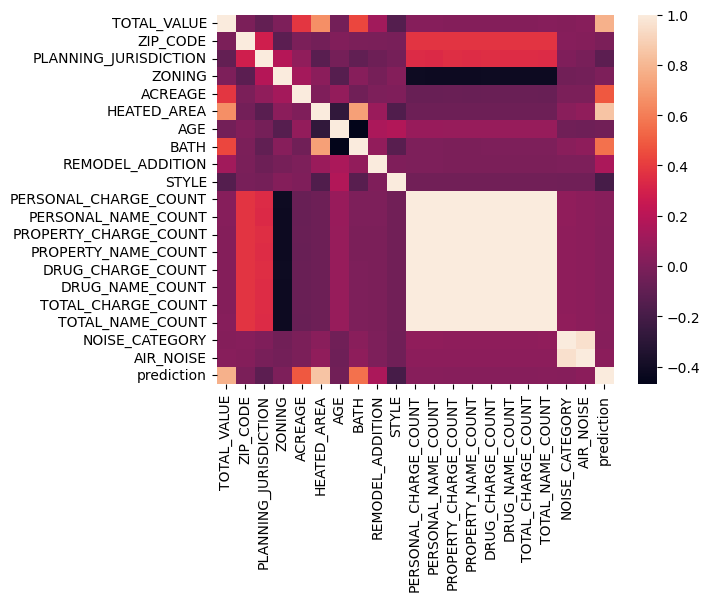

In [68]:
# https://stackoverflow.com/questions/39409866/correlation-heatmap
# Create a correlation heatmap to assess features for their significance
# load the R package ISLR
# infert = com.importr("ISLR")

# # load the Auto dataset
# df = com.load_data('Homes')

# # calculate the correlation matrix
# corr = df.corr()

# # plot the heatmap
# sns.heatmap(corr, 
#         xticklabels=corr.columns,
#         yticklabels=corr.columns)

Var_Corr = house_crime_noise_df.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=False)

In [44]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

Var_Corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,TOTAL_VALUE,ZIP_CODE,PLANNING_JURISDICTION,ZONING,ACREAGE,HEATED_AREA,AGE,BATH,REMODEL_ADDITION,STYLE,PERSONAL_CHARGE_COUNT,PERSONAL_NAME_COUNT,PROPERTY_CHARGE_COUNT,PROPERTY_NAME_COUNT,DRUG_CHARGE_COUNT,DRUG_NAME_COUNT,TOTAL_CHARGE_COUNT,TOTAL_NAME_COUNT,NOISE_CATEGORY,AIR_NOISE
TOTAL_VALUE,1.00,-0.01,-0.09,-0.00,0.38,0.66,-0.03,0.44,0.12,-0.15,0.02,0.03,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.03
ZIP_CODE,-0.01,1.00,0.29,-0.13,-0.01,-0.04,0.01,-0.01,-0.01,-0.02,0.38,0.37,0.38,0.38,0.38,0.38,0.38,0.38,0.03,0.02
PLANNING_JURISDICTION,-0.09,0.29,1.00,0.19,0.06,-0.13,-0.03,-0.10,-0.06,-0.03,0.34,0.33,0.35,0.35,0.35,0.35,0.35,0.34,0.00,-0.02
ZONING,-0.00,-0.13,0.19,1.00,0.13,0.04,-0.14,0.03,-0.03,0.02,-0.42,-0.42,-0.42,-0.42,-0.42,-0.42,-0.42,-0.42,-0.04,-0.04
ACREAGE,0.38,-0.01,0.06,0.13,1.00,0.00,0.07,-0.05,-0.00,0.00,-0.07,-0.07,-0.07,-0.07,-0.07,-0.07,-0.07,-0.07,-0.01,-0.01
HEATED_AREA,0.66,-0.04,-0.13,0.04,0.00,1.00,-0.28,0.71,0.10,-0.16,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,0.04,0.06
AGE,-0.03,0.01,-0.03,-0.14,0.07,-0.28,1.00,-0.47,0.15,0.17,0.09,0.09,0.09,0.09,0.08,0.08,0.09,0.09,-0.05,-0.05
BATH,0.44,-0.01,-0.10,0.03,-0.05,0.71,-0.47,1.00,0.07,-0.14,-0.00,-0.00,-0.01,-0.01,-0.00,-0.00,-0.00,-0.00,0.04,0.05
REMODEL_ADDITION,0.12,-0.01,-0.06,-0.03,-0.00,0.10,0.15,0.07,1.00,0.00,-0.00,-0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00,-0.00
STYLE,-0.15,-0.02,-0.03,0.02,0.00,-0.16,0.17,-0.14,0.00,1.00,-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,-0.05,-0.05


In [45]:
# Select features we're interested in
features = ['HEATED_AREA', 'BATH', 'AGE', 'ACREAGE', 'ZIP_CODE', 'STYLE', 'REMODEL_ADDITION', 'PLANNING_JURISDICTION', 'ZONING', 'TOTAL_CHARGE_COUNT', 'AIR_NOISE']
X = house_crime_noise_df[features]
X

,HEATED_AREA,BATH,AGE,ACREAGE,ZIP_CODE,STYLE,REMODEL_ADDITION,PLANNING_JURISDICTION,ZONING,TOTAL_CHARGE_COUNT,AIR_NOISE
0,1828,2.0,59,0.21,27610,8,0,10,4.0,13426.0,0.0
1,1240,1.0,53,0.46,27610,0,0,10,4.0,13426.0,0.0
2,1037,2.0,24,0.43,27606,0,0,10,4.0,13426.0,0.0
3,2261,2.0,123,0.46,27591,0,0,14,3.0,198.0,0.0
4,996,1.0,67,0.51,27603,0,0,6,2.0,13426.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
185922,1292,2.0,1,0.17,27597,0,0,16,4.0,231.0,0.0
185923,2328,2.5,56,0.56,27607,8,0,10,6.0,13426.0,0.0
185924,916,1.0,73,1.11,27591,0,0,13,30.0,198.0,0.0
185929,3202,3.5,6,0.34,27607,0,0,10,4.0,13426.0,0.0


In [46]:
# 'TOTAL_VALUE' home cost is our target variable
y = house_crime_noise_df['TOTAL_VALUE']
y

0         249321
1         159933
2         222624
3         150723
4         140801
           ...  
185922    212299
185923    526414
185924     55107
185929    897806
185930    552648
Name: TOTAL_VALUE, Length: 146850, dtype: int64

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Apply StandardScaler to our X_train and X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
# Create a Linear Regression model
home_value_model = LinearRegression()

In [51]:
# Train the model
home_value_model.fit(X_train, y_train)

# Coefficients of the model
print('Coefficients: \n', home_value_model.coef_)

# Intercept of the model
print('Intercept: \n', home_value_model.intercept_)

# The score method returns the R^2 score
score = home_value_model.score(X_test, y_test)
print('R^2 score: ', score)

Coefficients: 
 [170801.14060092  10327.40446258  35391.67211376 102148.46261211
   -464.43115047 -16028.00121616   7698.61192474 -13639.80812217
  -3262.64478478  23383.44934925  -1167.99092431]
Intercept: 
 332022.4834610147
R^2 score:  0.4793997623950126


In [52]:
# You can now use the model to make predictions, for example:
y_pred = home_value_model.predict(X_test)

In [54]:
# Apply scaler to the original dataset for prediction
X_scaled = scaler.transform(house_crime_noise_df[features])

In [55]:
# Add predictions to dataframe
predictions = home_value_model.predict(X_scaled)
house_crime_noise_df['prediction'] = predictions

In [58]:
# Look at data distribution to determine bin edges
print(house_crime_noise_df['TOTAL_VALUE'].value_counts())

157332    105
164431     74
130118     53
154376     51
73041      45
         ... 
885381      1
195749      1
142988      1
128625      1
552648      1
Name: TOTAL_VALUE, Length: 117547, dtype: int64


In [61]:
# Define your bins edges
bins = [0, 100000, 200000, 300000, 400000, 500000, float('inf')]

In [62]:
# Define labels
value_labels = ['0-100k', '100-200k', '200-300k', '300-400k', '400-500k', '>500k']

In [63]:
# Create a new column with categorical labels
house_crime_noise_df['price_range'] = pd.cut(house_crime_noise_df['prediction'], bins=bins, labels=value_labels)

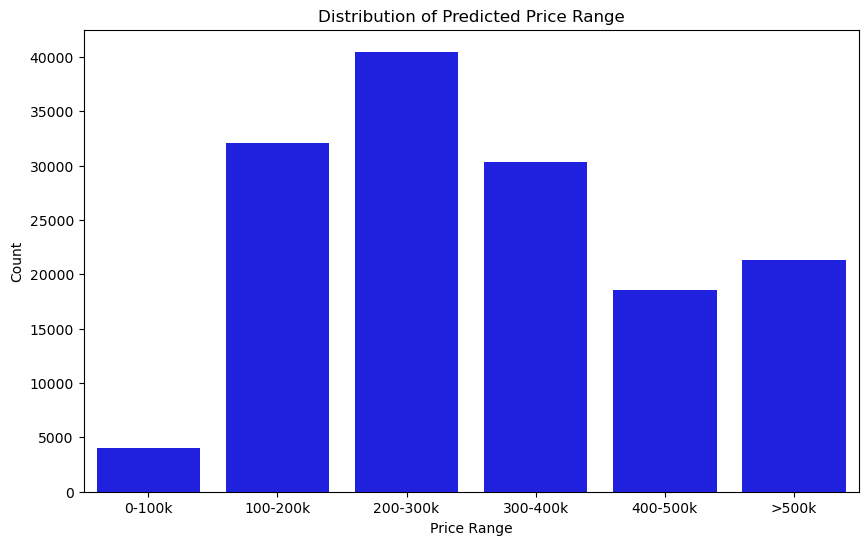

In [64]:
# Count the frequency of each category
value_counts = house_crime_noise_df['price_range'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=value_counts.index, y=value_counts.values, color='b')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Distribution of Predicted Price Range')
plt.show()

In [67]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 75928.4011435213


In [71]:
# Drop the 'prediction' column from the dataframe
house_crime_noise_df.drop(['prediction'], axis=1, inplace=True)

In [72]:
# Convert 'TOTAL_VALUE' into categorical variables for Low Value, Medium Value, and High Value homes
bins = [0, 150000, 300000, float('inf')]
labels = ['Low', 'Medium', 'High']
house_crime_noise_df['TOTAL_VALUE_CATEGORIES'] = pd.cut(house_crime_noise_df['TOTAL_VALUE'], bins=bins, labels=labels)
house_crime_noise_df

,TOTAL_VALUE,SITE_ADDRESS,CITY,ZIP_CODE,PLANNING_JURISDICTION,ZONING,ACREAGE,HEATED_AREA,AGE,BATH,...,PROPERTY_CHARGE_COUNT,PROPERTY_NAME_COUNT,DRUG_CHARGE_COUNT,DRUG_NAME_COUNT,TOTAL_CHARGE_COUNT,TOTAL_NAME_COUNT,NOISE_CATEGORY,AIR_NOISE,price_range,TOTAL_VALUE_CATEGORIES
0,249321,2457 BERTIE DR,RALEIGH,27610,10,4.0,0.21,1828,59,2.0,...,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0,0.0,0.0,200-300k,Medium
1,159933,2848 PROVIDENCE RD,RALEIGH,27610,10,4.0,0.46,1240,53,1.0,...,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0,0.0,0.0,100-200k,Medium
2,222624,409 S LAKESIDE DR,RALEIGH,27606,10,4.0,0.43,1037,24,2.0,...,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0,0.0,0.0,100-200k,Medium
3,150723,540 MARSHBURN RD,WENDELL,27591,14,3.0,0.46,2261,123,2.0,...,68.0,42.0,61.0,29.0,198.0,120.0,0.0,0.0,400-500k,Medium
4,140801,605 WOODLAND RD,RALEIGH,27603,6,2.0,0.51,996,67,1.0,...,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0,0.0,0.0,100-200k,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185922,212299,224 GOLDEN PLUM LN,ZEBULON,27597,16,4.0,0.17,1292,1,2.0,...,87.0,51.0,76.0,44.0,231.0,151.0,0.0,0.0,0-100k,Medium
185923,526414,2736 ROSEDALE AVE,RALEIGH,27607,10,6.0,0.56,2328,56,2.5,...,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0,0.0,0.0,300-400k,High
185924,55107,5816 WATKINS RD,WENDELL,27591,13,30.0,1.11,916,73,1.0,...,68.0,42.0,61.0,29.0,198.0,120.0,0.0,0.0,100-200k,Low
185929,897806,1809 STILLWATER DR,RALEIGH,27607,10,4.0,0.34,3202,6,3.5,...,5035.0,2634.0,3941.0,2042.0,13426.0,7621.0,0.0,0.0,>500k,High


In [73]:
print(house_crime_noise_df['TOTAL_VALUE_CATEGORIES'].value_counts())

Medium    72866
High      62442
Low       11542
Name: TOTAL_VALUE_CATEGORIES, dtype: int64


In [74]:
# Select target variable for Random Forest
y_rf = house_crime_noise_df['TOTAL_VALUE_CATEGORIES']

In [75]:
# Split the data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y_rf, test_size=0.2, random_state=42)

In [76]:
# Apply StandardScaler to our X_train and X_test
scaler_rf = StandardScaler()
X_train_rf = scaler_rf.fit_transform(X_train_rf)
X_test_rf = scaler_rf.transform(X_test_rf)

In [77]:
# Create a Random Forest Classifier model
rf_model = RandomForestClassifier()

In [78]:
# Train the model
rf_model.fit(X_train_rf, y_train_rf)

RandomForestClassifier()

In [80]:
# You can now use the model to make predictions
y_rf_pred = rf_model.predict(X_test_rf)

array(['High', 'Low', 'High', ..., 'Low', 'Medium', 'Low'], dtype=object)

In [81]:
# Confusion Matrix
cm = confusion_matrix(y_test_rf, y_rf_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[11583     7   830]
 [    6  1866   398]
 [  858   342 13480]]


In [82]:
# Classification Report
print('Classification Report:\n', classification_report(y_test_rf, y_rf_pred))

Classification Report:
               precision    recall  f1-score   support

        High       0.93      0.93      0.93     12420
         Low       0.84      0.82      0.83      2270
      Medium       0.92      0.92      0.92     14680

    accuracy                           0.92     29370
   macro avg       0.90      0.89      0.89     29370
weighted avg       0.92      0.92      0.92     29370



In [83]:
# Accuracy Score
accuracy = accuracy_score(y_test_rf, y_rf_pred)
print('Accuracy: ', accuracy * 100, '%')

Accuracy:  91.68879809329248 %


In [ ]:
# Let's go over what these results mean:

# Confusion Matrix: The rows represent the actual classes and columns represent the predicted classes. Each cell at the intersection of row 'i' and column 'j' represents the number of instances of class 'i' that were predicted as class 'j'. For example, there were 11,583 instances that were actually 'High' and were correctly predicted as 'High', 7 instances that were actually 'High' but were predicted as 'Low', and 830 instances that were actually 'High' but were predicted as 'Medium'.

# Classification Report:

# Precision is the ability of the classifier to not label a negative sample as positive. In other words, for each class it is defined as the ratio of true positives to the sum of true and false positives. For instance, for the 'High' class, it is calculated as 11583 / (11583 + 7 + 830) = 0.93. The higher the precision, the more accurate the classifier is.
# Recall (Sensitivity) is the ability of the classifier to find all the positive samples. It can be defined as the ratio of true positives to the sum of true positives and false negatives. For the 'High' class, it is calculated as 11583 / (11583 + 6 + 858) = 0.93. The higher the recall, the more complete the results are.
# The F1 score is the harmonic mean of precision and recall. An F1 score reaches its best value at 1 and worst at 0.
# Support is the number of actual occurrences of the class in the specified dataset. For instance, 'High' has a support of 12420, which means there are 12420 'High' records in the test dataset.
# Accuracy: This is simply the ratio of correct predictions to the total predictions.

# Overall, the model is doing a good job of predicting house prices based on the given features. The precision, recall, and F1-score are all high, which suggests that the model is accurately predicting the classes and is capturing a high proportion of the positive instances for each class. However, there is room for improvement. There are some misclassifications and the model's performance on the 'Low' class is a bit lower compared to the other classes, which is likely due to the class imbalance we discussed earlier. You might want to consider addressing the class imbalance and/or tuning the model's hyperparameters to see if you can improve the performance.